<a href="https://colab.research.google.com/github/Rishikesh11kr/SEVEN7CODE_TECHNOLOGIES/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Titanic Classification:
Titanic Survival Prediction Dataset

By Rishkesh Kumar

Made a system which tells whether the person will be save
from sinking. What factors were most likely lead to success socio-economic status, age, gender and more.

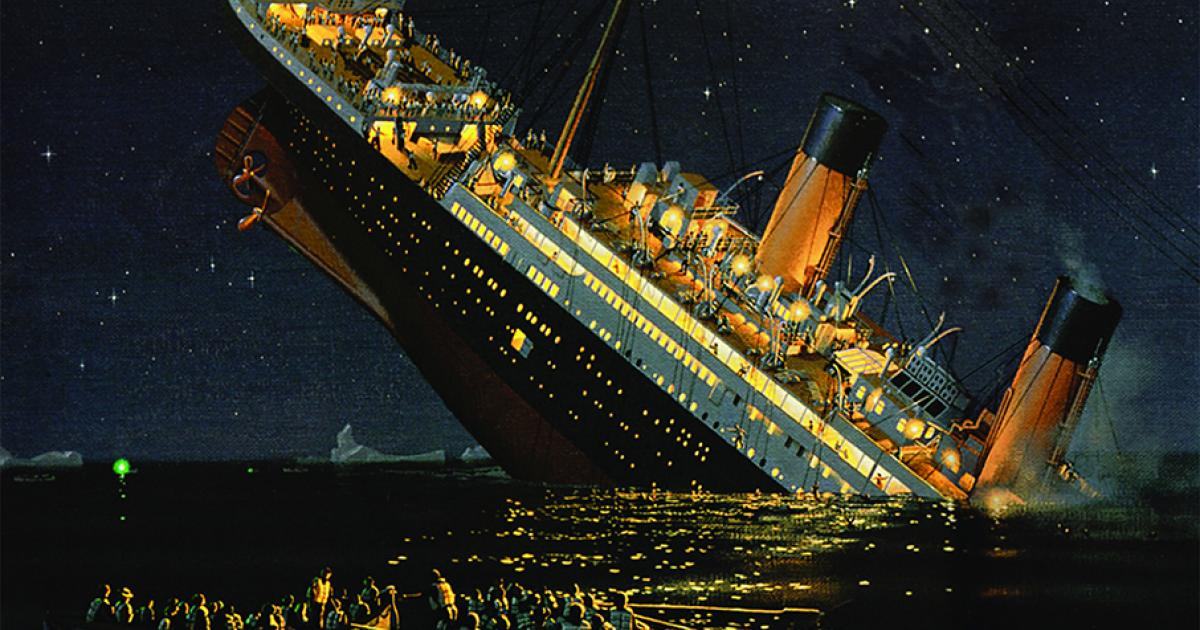

In [ ]:
import os
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#list all files under the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#path for the training set
data_path = "/content/Titanic-Dataset.csv"

In [ ]:
data = pd.read_csv(data_path)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data=data.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

In [ ]:
print(data.shape)
print(data.dtypes)
print(data.info())

(891, 8)
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [ ]:
data.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


# Visualization

In [ ]:
perc = ((data['Sex'].value_counts())/len(data))*100
print('percentage of gender:\n',perc)

percentage of gender:
 male      64.758698
female    35.241302
Name: Sex, dtype: float64


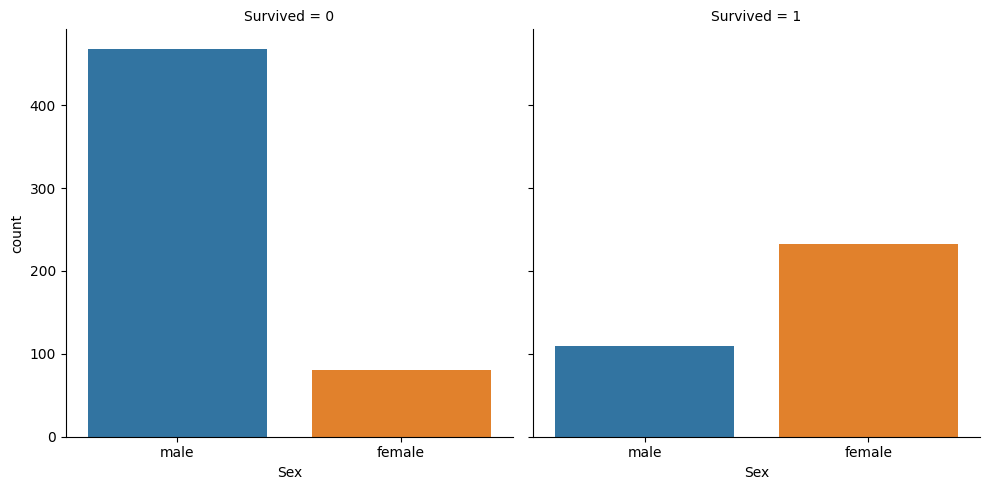

In [ ]:
# Visualizing the survival of passengers based on their Sex
'''
v1 = sns.FacetGrid(data, col='Survived')
v1.map(plt.hist, 'Sex', alpha=0.5)
v1.add_legend()
'''
#//////////////////////////////////or\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

sns.catplot(data=data , x='Sex', col='Survived', kind='count')

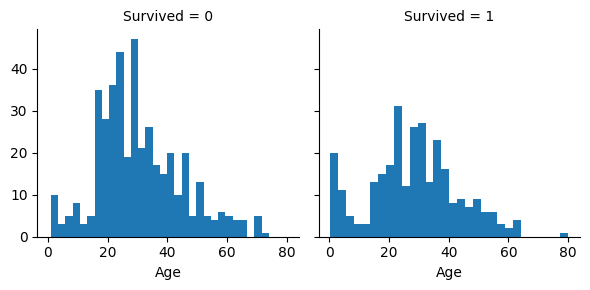

In [ ]:
# Visualizing the survival of passengers based on their age

v2 = sns.FacetGrid(data, col='Survived')

v2.map(plt.hist, 'Age', bins=30)

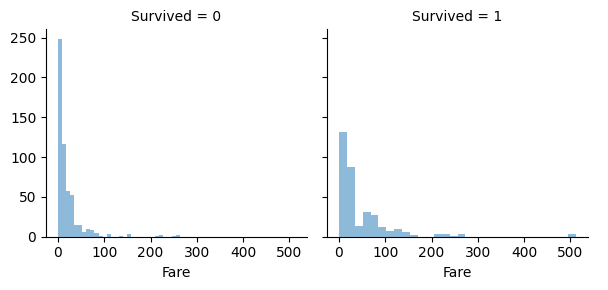

In [ ]:
# Visualizing the survival of passengers based on their Fare
warnings.filterwarnings("ignore")
v3 = sns.FacetGrid(data, col='Survived')
v3.map(plt.hist, 'Fare', alpha=0.5, bins=30)
v3.add_legend()

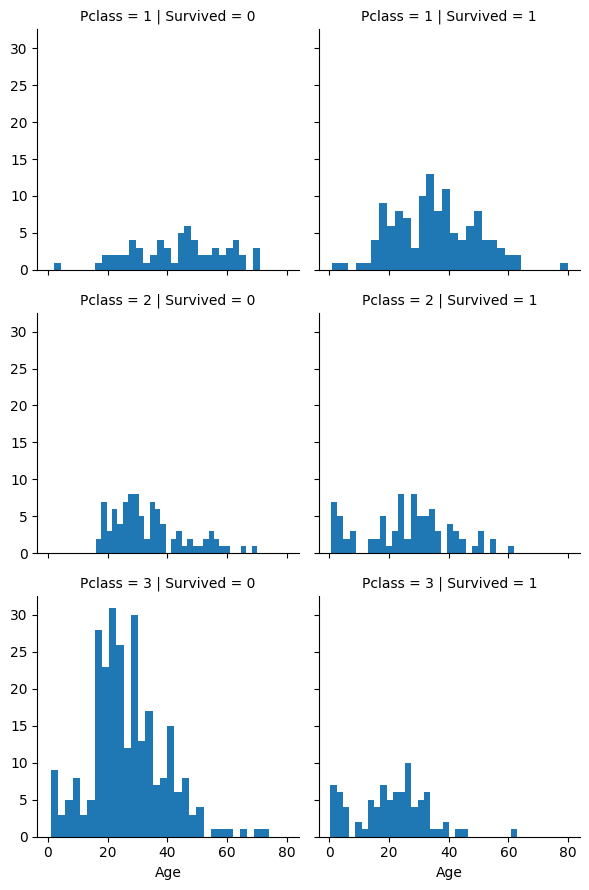

In [ ]:
# Visualizing the survival of passengers based on their Age and Pclass

v4 = sns.FacetGrid(data, col='Survived', row='Pclass')

v4.map(plt.hist, 'Age', bins=30)

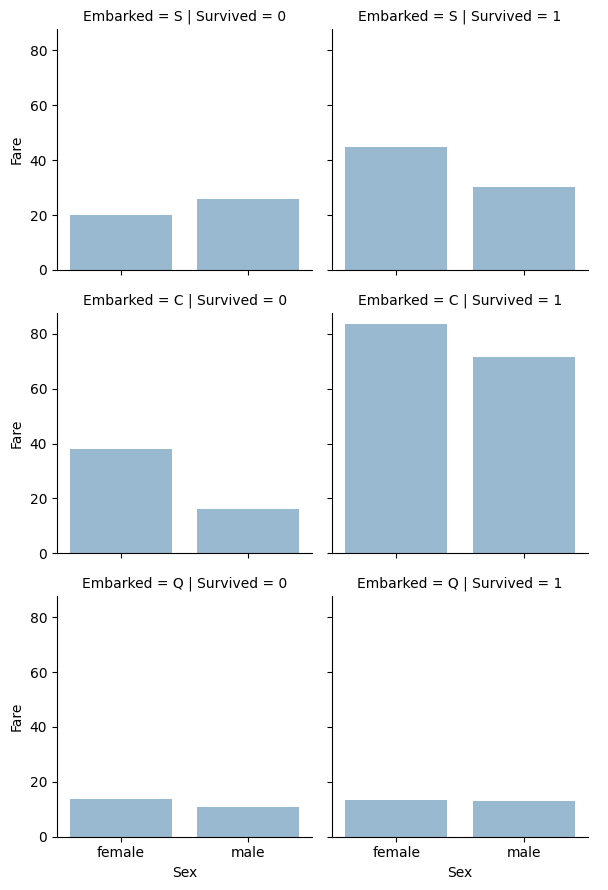

In [ ]:
# Visualizing the survival of passengers based on their Sex, Fare, Embarked
warnings.filterwarnings("ignore")
v5 = sns.FacetGrid(data, col='Survived', row='Embarked')
v5.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
v5.add_legend()

# Preprocessing
**Duplicate records**

In [ ]:
# Checking duplicate rows
print(data.duplicated().sum())
data[data.duplicated()]

111


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,NaN,0,0,7.7500,Q
76,0,3,male,NaN,0,0,7.8958,S
77,0,3,male,NaN,0,0,8.0500,S
87,0,3,male,NaN,0,0,8.0500,S
95,0,3,male,NaN,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [ ]:
# dropping duplicate rows
data = data.drop_duplicates()
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Filling missing values

missing values in columns: 
 Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


<Axes: >

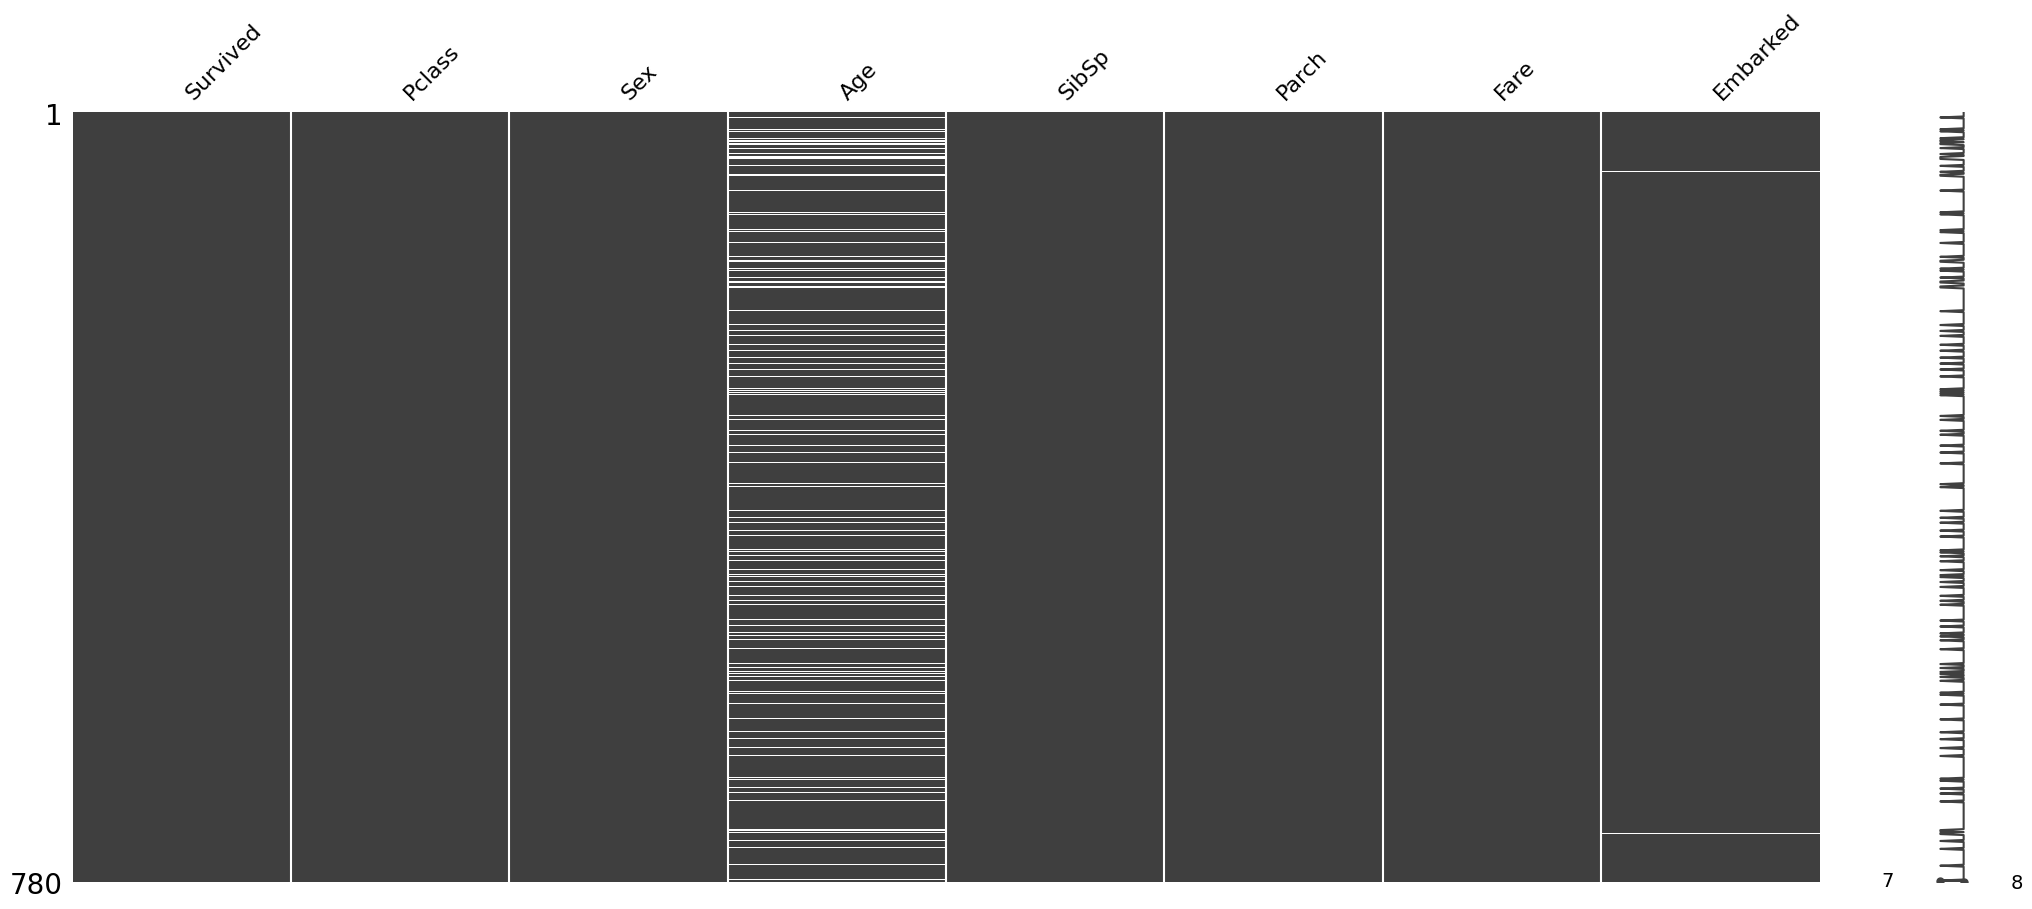

In [ ]:
# Checking missing value
print("missing values in columns: \n",data.isna().sum())
msno.matrix(data)

In [ ]:
# data["Age"] = data["Age"].fillna(value=data["Age"].mean())
# or
# compute mean and std of `Age`
Age_mean = data['Age'].mean()
Age_std = data['Age'].std()

# number of NaN in `Age` column
num_na = data['Age'].isna().sum()

# generate `num_na` samples from N(age_mean, age_std**2) distribution
rand_vals = Age_mean + Age_std * np.random.randn(num_na)
# replace missing values with `rand_vals`
data.loc[data['Age'].isna(), 'Age'] = rand_vals

# filling missing values in Embarked col
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

<Axes: >

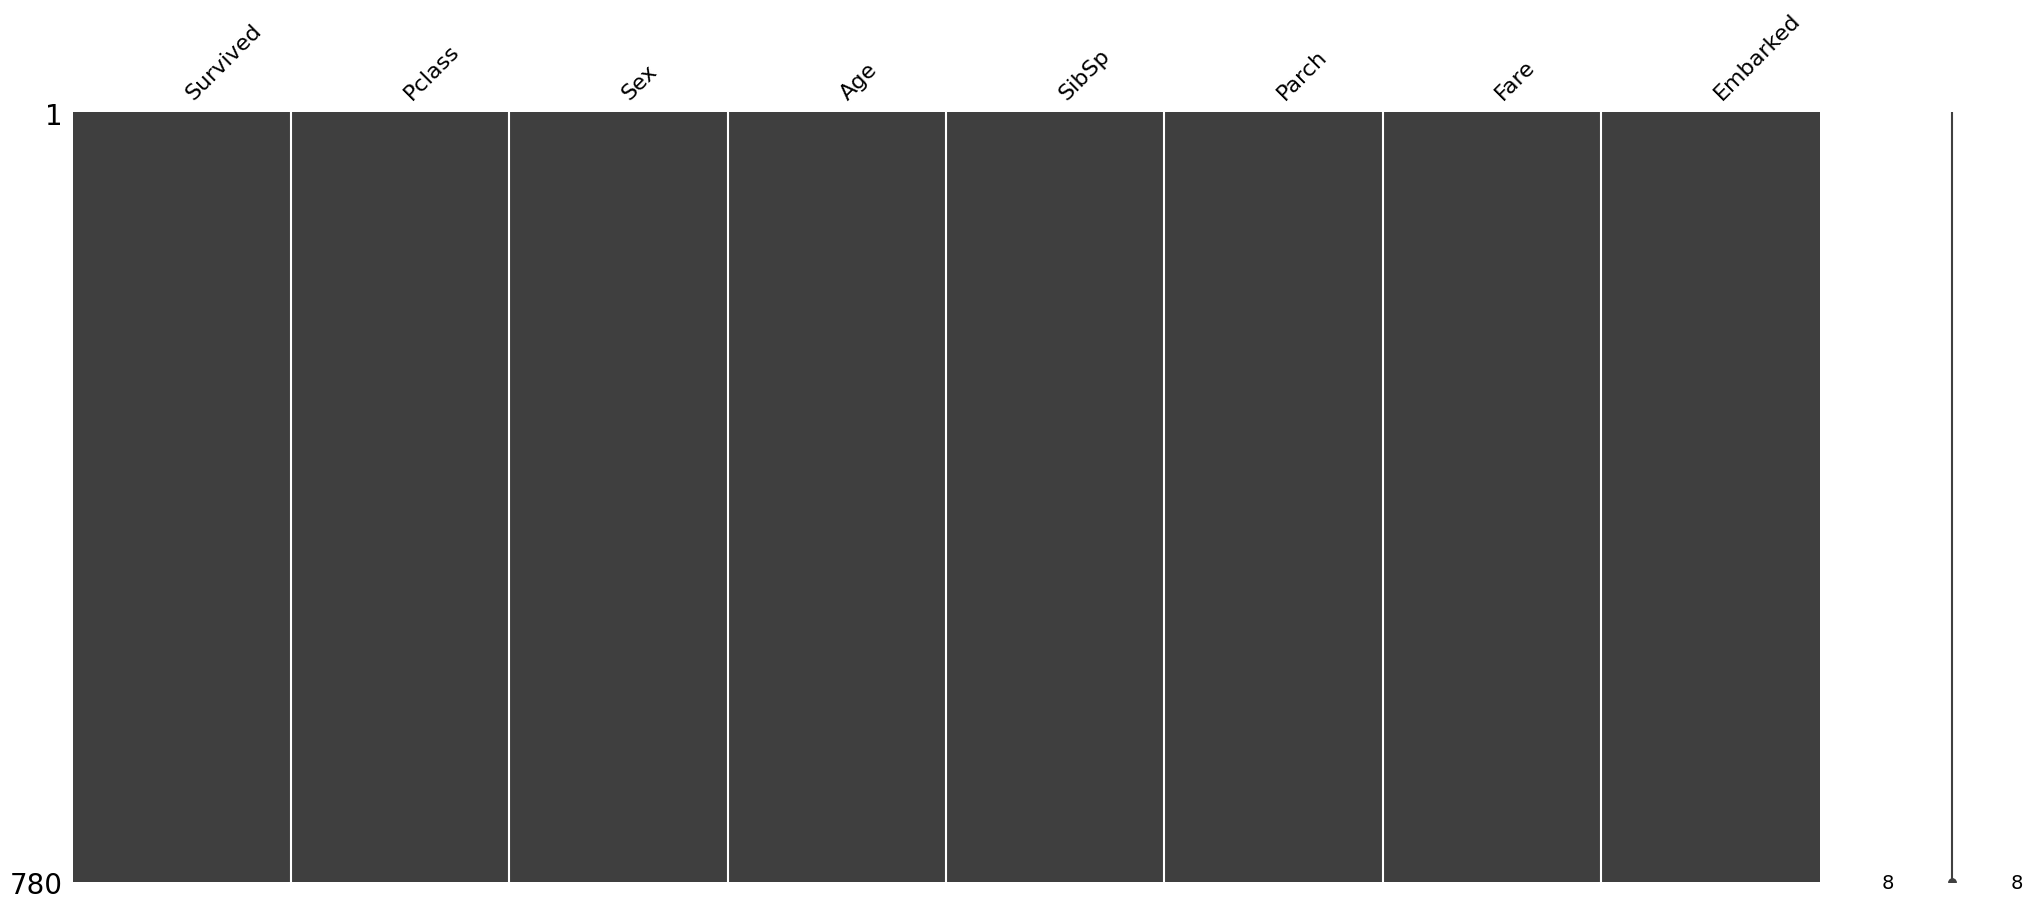

In [ ]:
# Checking missing value (Again)
msno.matrix(data)

In [ ]:
# Checking distplot of Age col
'''
plt.figure(figsize=(15, 5))
plt.title("Age", fontsize="small")
sns.distplot(data['Age'])
fig = plt.gcf()
'''

'\nplt.figure(figsize=(15, 5))\nplt.title("Age", fontsize="small")\nsns.distplot(data[\'Age\'])\nfig = plt.gcf()\n'



---



# **Label Encoding**

*Using pd.get_dummies for Label Encoding "Sex", and "Embarked" features.*


In [ ]:
#data.Pclass=data.Pclass.map({1:'first class', 2:'second class', 3:'third class'})
data = pd.get_dummies(data, drop_first=True)

# Normalization

In [ ]:
X = data.drop(["Survived"], axis = 1)
y = data.loc[:, "Survived"].values

In [ ]:
# Split Data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Model selection
**Logistic Regression**

In [ ]:
'''
ct = ColumnTransformer([('X_train', MinMaxScaler(), ['Age','Fare'])], remainder ='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
'''
# ////////////// or \\\\\\\\\\\\\\\
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

In [ ]:
#Model selection¶
#Logistic Regression
# Logistic Regression Classifier
LogReg = LogisticRegression(random_state=42, solver="liblinear")
LogReg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Predict
y_pred = LogReg.predict(X_test)

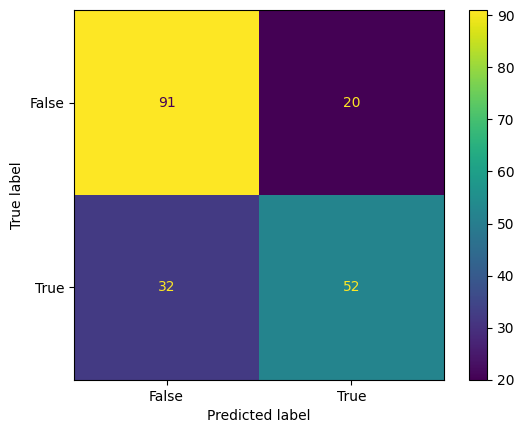

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=LogReg.classes_)
# print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix_Norm'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

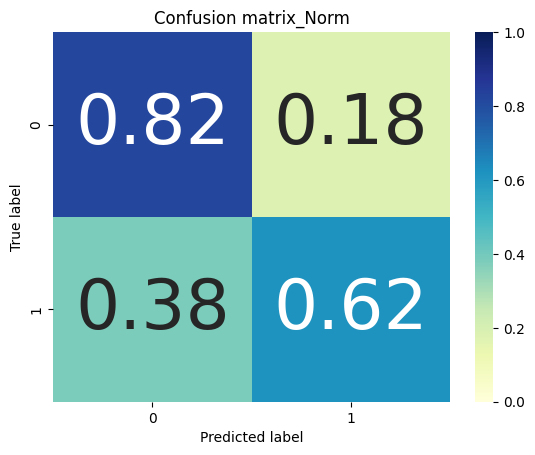

In [ ]:
confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(confusion_matrix_norm, classes = LogReg.classes_, title='Confusion matrix_Norm')

In [ ]:
#Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred)
print("Recall score:",recall)
f1_score = metrics.f1_score(y_test, y_pred)
print("f1_score:",f1_score)

Accuracy score: 0.7333333333333333
Precision score: 0.7222222222222222
Recall score: 0.6190476190476191
f1_score: 0.6666666666666666


In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", LogReg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", LogReg.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

The Training Accuracy is:  0.7914529914529914
The Testing Accuracy is:  0.7333333333333333
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       111
           1       0.72      0.62      0.67        84

    accuracy                           0.73       195
   macro avg       0.73      0.72      0.72       195
weighted avg       0.73      0.73      0.73       195



In [ ]:
from sklearn.metrics import accuracy_score
C = 10

# Create different classifiers.
classifiers = {
    "Logistic Regression" : LogisticRegression(
      random_state=42, solver="liblinear", max_iter=10000),
    "L1 logistic": LogisticRegression(
        C=C, penalty="l1", random_state=42, solver="liblinear", max_iter=10000
    ),
    "L2 logistic": LogisticRegression(
        C=C, penalty="l2", random_state=42, solver="liblinear", max_iter=10000
    ),
    "Xgboost Classification ": XGBClassifier(
       random_state=42
    ),
    "Random Forest Classification ": RandomForestClassifier(
       random_state=42, max_depth=5
    )
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    print("classifire={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, \n".format(name, classifier.score(X_train, y_train, sample_weight=None), classifier.score(X_test, y_test)))

classifire=Logistic Regression, The Training Accuracy=0.7915, The Testing Accuracy=0.7333, 

classifire=L1 logistic, The Training Accuracy=0.7812, The Testing Accuracy=0.7385, 

classifire=L2 logistic, The Training Accuracy=0.7846, The Testing Accuracy=0.7333, 

classifire=Xgboost Classification , The Training Accuracy=0.9846, The Testing Accuracy=0.7590, 

classifire=Random Forest Classification , The Training Accuracy=0.8479, The Testing Accuracy=0.7641, 



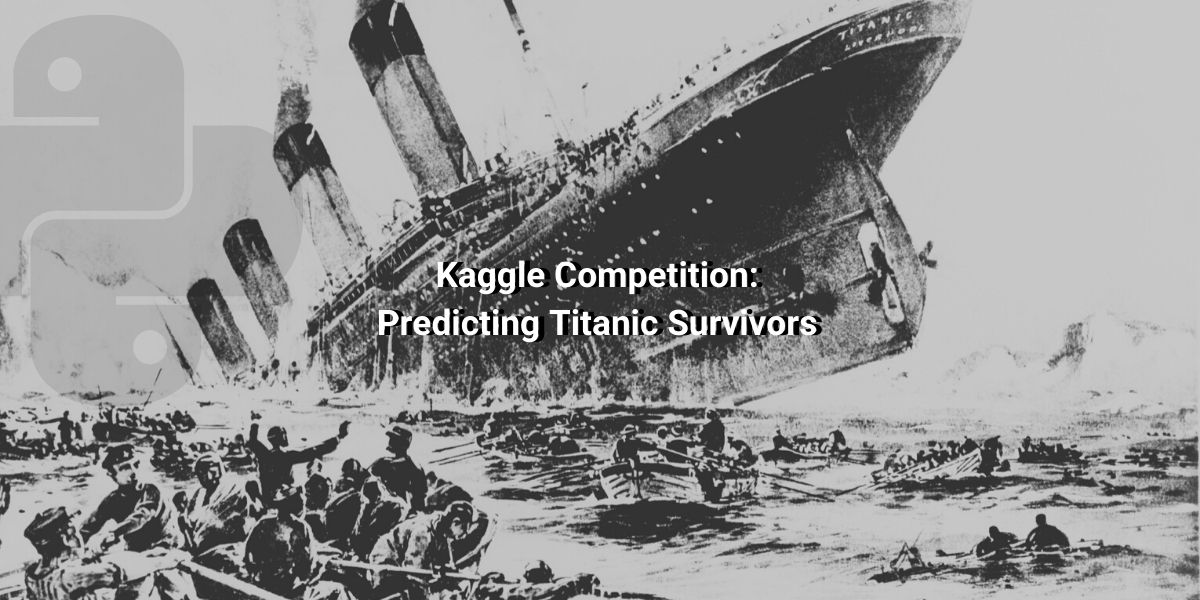

# Thank you